In [1]:
import sys
sys.path.append("/Users/andyreagan/tools/python/labMTsimple/")
from labMTsimple.speedy import *
from labMTsimple.storyLab import *

import re
import codecs
from os import listdir,mkdir
from os.path import isfile,isdir
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc,rcParams
rc("xtick", labelsize=8)
rc("ytick", labelsize=8)
rc("font",**{"family":"serif","serif":["cmr10"]})
# rc("text", usetex=True)
figwidth_onecol = 8.5
figwidth_twocol = figwidth_onecol/2

import numpy as np
from json import loads
import csv
from datetime import datetime,timedelta
import pickle

from subprocess import call

from scipy.stats import pearsonr

error_logging = True
sys.path.append("/Users/andyreagan/tools/python/kitchentable")
from dogtoys import *



test_name = "LabMT-ANEW-LIWC-MPQA-Liu-WK-long"
allLengths = [1,   2,   3,   5,   7,   10, 15,  25, 40, 60, 80,100,150,250,400,600,900,1000]
allSamples = [1000,2000,1500,1500,1000,900,750,600,500,250,100, 75, 75, 55, 40, 25, 15,   1]
allSamples[0] = 1000
allSamples[-1] = 1


middle=100
test_name = "LabMT-ANEW-LIWC-MPQA-Liu-WK-{}".format(middle)
allLengths = [1,   2,   3,   5,   7,   10, 15,  25, 40, 60, 80,100,150,250,400,600,900,1000]
allSamples = [middle for i in range(len(allLengths))]
allSamples[0] = 1000
allSamples[-1] = 1


test_name = "all-test"
allLengths = [1,   2,   3,   5,   7,   10, 15,  25, 40, 60, 80,100,150,250,400,600,900,1000]
# allSamples = [1000,2000,1500,1500,1000,900,750,600,500,250,100, 75, 75, 55, 40, 25, 15,   1]
allSamples = [1 for i in range(len(allLengths))]
allSamples[0] = 1000
allSamples[-1] = 1

test_name = "all-singles"
allLengths = [1]
allSamples = [1000]

In [2]:
def sampleReviewsDict(numReviews,numSamples,filelist,wordsRE,prefix,test="LabMT-ANEW-LIWC-MPQA-Liu-WK"):
    """Sample from all of the review."""
    if numReviews == 1:
        choose_randomly = False
    else:
        choose_randomly = True

    scores = [[0.0 for i in range(numSamples)] for j in range(len(wordsRE))]
    for i in range(numSamples):
        # print("on sample {0}".format(i))

        if choose_randomly:
            files = np.random.choice(filelist,size=numReviews,replace=False)
        else:
            files = [filelist[i]]

        # forget the string expansion
        # let"s store them as a dict
        allwordcounts = dict()
        for file in files:
            # ########################################
            # # this makes the dicts if they're needed
            # if isfile(file+".dict"):
            #     my_dict = pickle.load( open( file+".dict", "rb" ) )
            #     for word in my_dict:
            #         if word in allwordcounts:
            #             allwordcounts[word] += my_dict[word]
            #         else:
            #             allwordcounts[word] = my_dict[word]
            # else:
            #     # read the txt file
            #     f = open(file+".txt","r")
            #     rawtext = f.read()
            #     f.close()
            #     # dictify_general it
            #     tmp_dict = dict()
            #     dictify_general(rawtext,tmp_dict)
            #     pickle.dump( tmp_dict , open( file+".dict", "wb" ) )
            #     # add to the full dict
            #     dictify_general(rawtext,allwordcounts)

            # ###################################################
            # # this loads the dicts
            # my_dict = pickle.load( open( file+".dict", "rb" ) )
            # for word in my_dict:
            #     if word in allwordcounts:
            #         allwordcounts[word] += my_dict[word]
            #     else:
            #         allwordcounts[word] = my_dict[word]

            ########################################
            # this loads the files
            f = open(file+".txt","r")
            rawtext = f.read()
            f.close()
            # add to the full dict
            dictify_general(rawtext,allwordcounts)

        for j in range(len(wordsRE)):
            scores[j][i] = wordsRE[j].score(allwordcounts)

    f = open("output/{0}-{1}-{2:.0f}-{3:.0f}.csv".format(test,prefix,numReviews,numSamples),"w")
    csv_writer = csv.writer(f)
    for row in scores:
        csv_writer.writerow(row)
    f.close()
    
    return scores

In [3]:
stopVal = 0.0
allDicts = (LabMT(stopVal=1.0),
            ANEW(stopVal=stopVal),
            LIWC(stopVal=stopVal),
            MPQA(stopVal=stopVal),
            Liu(stopVal=stopVal),
            WK(stopVal=stopVal),
            PANASX(stopVal=stopVal),
            pattern(stopVal=stopVal),
            sentiWordNet(stopVal=stopVal),
            AFINN(stopVal=stopVal),
            GI(stopVal=stopVal),
            WDAL(stopVal=stopVal),
            NRC(stopVal=stopVal))

loading LabMT with stopVal=1.0, for 3731 words
loading ANEW with stopVal=0.0, for 1034 words
loading data/LIWC/LIWC2007_English100131_words.dic
loading LIWC with stopVal=0.0, for 4483 words
loading MPQA with stopVal=0.0, for 7192 words
loading Liu with stopVal=0.0, for 6782 words
loading WK with stopVal=0.0, for 13915 words
loading PANAS-X with stopVal=0.0, for 20 words
loading Pattern with stopVal=0.0, for 1528 words
loading SentiWordNet with stopVal=0.0, for 147700 words
loading AFINN with stopVal=0.0, for 2477 words
oops, deal is both pos and negative
oops, fine is both pos and negative
oops, fine is both pos and negative
oops, fun is both pos and negative
oops, help is both pos and negative
oops, laugh is both pos and negative
oops, matter is both pos and negative
oops, order is both pos and negative
oops, particular is both pos and negative
oops, pass is both pos and negative
loading General Inquirer with stopVal=0.0, for 3629 words
loading Whissel's Dictionary of Affective Langua

In [4]:
results = [[[] for i in range(len(allLengths))],[[] for i in range(len(allLengths))]]
for j,flip in enumerate(["pos","neg"]):
    files = ["../data/moviereviews/txt_sentoken/{0}/{1}".format(flip,x.replace(".txt",""))
             for x in listdir("../data/moviereviews/txt_sentoken/{0}/".format(flip)) if ".txt" in x]
    prefix = "{0}Scores".format(flip)
    for i,numReviews in enumerate(allLengths):
        numSamples = allSamples[i]
        print("taking {0} samples of {1} reviews".format(numSamples,numReviews))
        results[j][i] = sampleReviewsDict(numReviews,numSamples,files,allDicts,prefix,test=test_name)

taking 1000 samples of 1 reviews
taking 1000 samples of 1 reviews


In [5]:
# results

In [6]:
negcolor = "#4C4CFF" # shift blue
poscolor = "#FFFF4C" # shift yellow
poscolor = "#ff7f00" # orange (shift yellow too hard to read)

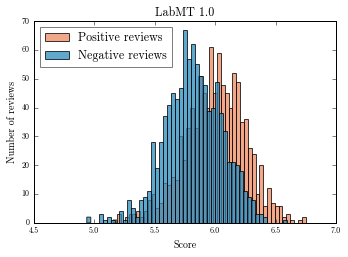

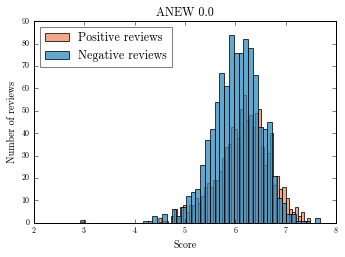

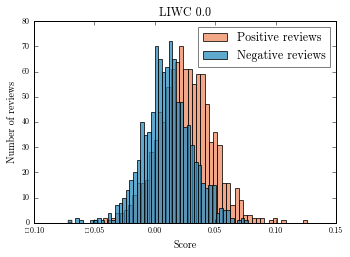

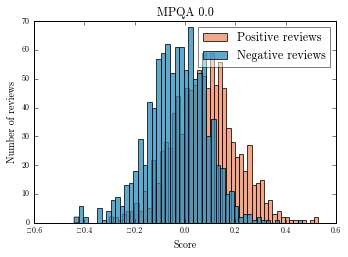

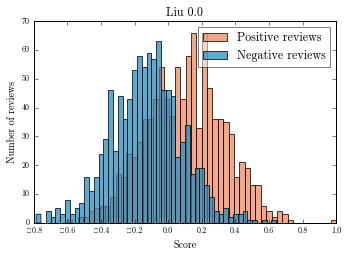

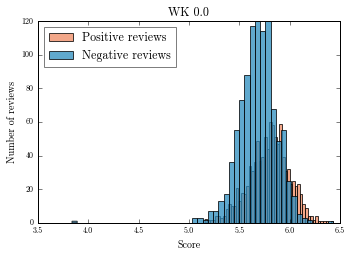

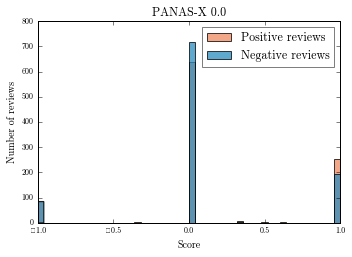

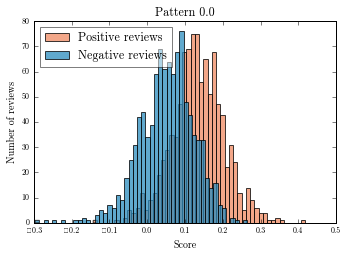

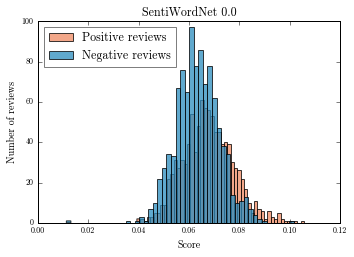

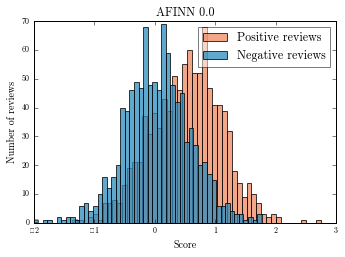

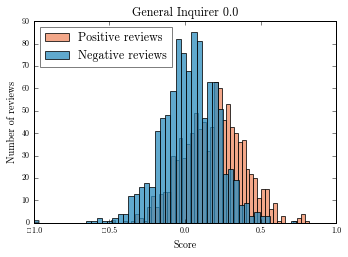

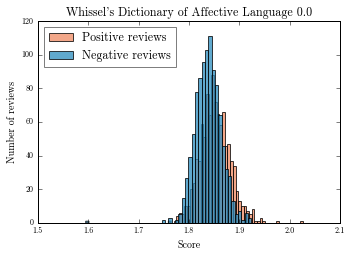

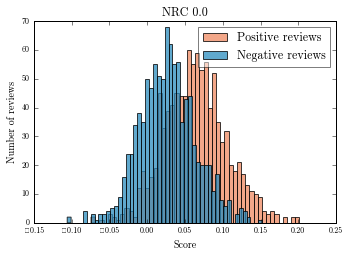

In [7]:
pos_scores = results[0]
neg_scores = results[1]
nbins=50
review_length = 0
dict_num = 0
for dict_num,my_dict in enumerate(allDicts):
    fig = plt.figure()
    ax1 = fig.add_axes([0.15,0.2,0.7,0.7])
    ax1.hist(pos_scores[review_length][dict_num], nbins, alpha=0.75, facecolor="#ef8a62",)
    ax1.hist(neg_scores[review_length][dict_num], nbins, alpha=0.75, facecolor="#2b8cbe",)
    ax1.legend(["Positive reviews","Negative reviews"],loc="best",framealpha=0.5)
    # ax1.set_title("{0} score distribution for {1} reviews".format(titles[j],allLengths[i]))
    ax1.set_xlabel("Score")
    ax1.set_ylabel("Number of reviews")
    ax1.set_title("{} {}".format(my_dict.title,my_dict.stopVal))

    # mysavefig("{0}-{1}reviews-dist".format(titles[j],allLengths[i]))
    # mysavefig("{0}-{1}reviews-dist".format(titles[j],allLengths[i]))
    # mysavefig("reviews-dist-{0}-{1}.pdf".format(titles[j],allLengths[i]),date=False,folder="figures/moviereviews")
    # plt.close(fig)

In [8]:
flip = "pos"
pos_files = ["../data/moviereviews/txt_sentoken/{0}/{1}".format(flip,x.replace(".txt",""))
             for x in listdir("../data/moviereviews/txt_sentoken/{0}/".format(flip)) if ".txt" in x]
flip = "neg"
neg_files = ["../data/moviereviews/txt_sentoken/{0}/{1}".format(flip,x.replace(".txt",""))
             for x in listdir("../data/moviereviews/txt_sentoken/{0}/".format(flip)) if ".txt" in x]
pos_scores = sampleReviewsDict(1,1000,pos_files,[allDicts[0]],"labMT-calibration-pos",test=test_name)
neg_scores = sampleReviewsDict(1,1000,neg_files,[allDicts[0]],"labMT-calibration-neg",test=test_name)

In [9]:
len(pos_scores)

1

In [10]:
len(pos_scores[0])

1000

In [11]:
np.mean(pos_scores[0])

5.9980899297927133

In [12]:
np.mean(neg_scores[0])

5.8191841590949318

In [13]:
average_score = np.mean(neg_scores[0]+pos_scores[0])

In [14]:
j = 0
# fraction of scores across the mean
overlap = float(len(np.where(pos_scores[j] < average_score)[0]) + len(np.where(neg_scores[j] > average_score)[0])) /(len(pos_scores[j])+len(neg_scores[j]))

In [15]:
allLabMT = [LabMT(stopVal=x) for x in np.arange(0,3.25,.25)]

loading LabMT with stopVal=0.0, for 10222 words
loading LabMT with stopVal=0.25, for 8076 words
loading LabMT with stopVal=0.5, for 6422 words
loading LabMT with stopVal=0.75, for 4919 words
loading LabMT with stopVal=1.0, for 3731 words
loading LabMT with stopVal=1.25, for 2756 words
loading LabMT with stopVal=1.5, for 2031 words
loading LabMT with stopVal=1.75, for 1428 words
loading LabMT with stopVal=2.0, for 1008 words
loading LabMT with stopVal=2.25, for 636 words
loading LabMT with stopVal=2.5, for 363 words
loading LabMT with stopVal=2.75, for 195 words
loading LabMT with stopVal=3.0, for 77 words


In [16]:
pos_scores = sampleReviewsDict(1,1000,pos_files,allLabMT,"labMT-calibration-pos",test="")
neg_scores = sampleReviewsDict(1,1000,neg_files,allLabMT,"labMT-calibration-neg",test="")

In [17]:
def overlap(p,n):
    # pos scores and neg scores are lists of scores
    # called p and n now
    
    # take the average
    a = np.mean(n+p)
    return float(len(np.where(p < a)[0]) + len(np.where(n > a)[0])) / (len(p+n))

In [18]:
labMT_cal = [overlap(pos_scores[j],neg_scores[j]) for j in range(len(allLabMT))]

In [19]:
labMT_cal

[0.3615,
 0.343,
 0.3475,
 0.349,
 0.3465,
 0.3535,
 0.3635,
 0.3715,
 0.3695,
 0.385,
 0.4235,
 0.429,
 0.452]

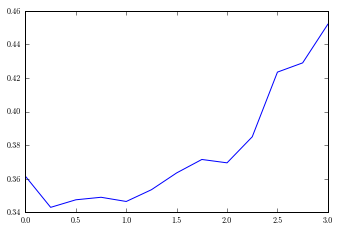

In [20]:
fig = plt.figure()
ax1 = fig.add_axes([0.15,0.2,0.7,0.7])
ax1.plot(np.arange(0,3.25,.25),labMT_cal)


In [21]:
def calibrate(my_senti,my_range):
    flip = "pos"
    pos_files = ["../data/moviereviews/txt_sentoken/{0}/{1}".format(flip,x.replace(".txt",""))
                 for x in listdir("../data/moviereviews/txt_sentoken/{0}/".format(flip)) if ".txt" in x]
    flip = "neg"
    neg_files = ["../data/moviereviews/txt_sentoken/{0}/{1}".format(flip,x.replace(".txt",""))
                 for x in listdir("../data/moviereviews/txt_sentoken/{0}/".format(flip)) if ".txt" in x]
    all_senti = [my_senti(stopVal=x) for x in my_range]
    pos_scores = sampleReviewsDict(1,1000,pos_files,all_senti,"{}-calibration-pos".format(my_senti.title),test="")
    neg_scores = sampleReviewsDict(1,1000,neg_files,all_senti,"{}-calibration-neg".format(my_senti.title),test="")
    my_cal = [overlap(pos_scores[j],neg_scores[j]) for j in range(len(all_senti))]
#     fig = plt.figure()
#     ax1 = fig.add_axes([0.15,0.2,0.7,0.7])
#     ax1.plot(my_range,my_cal)
#     ax1.set_title("{} Calibration".format(my_senti.title))
    return my_cal

In [22]:
calibrate(LabMT,np.arange(0,3.25,.25))

loading LabMT with stopVal=0.0, for 10222 words
loading LabMT with stopVal=0.25, for 8076 words
loading LabMT with stopVal=0.5, for 6422 words
loading LabMT with stopVal=0.75, for 4919 words
loading LabMT with stopVal=1.0, for 3731 words
loading LabMT with stopVal=1.25, for 2756 words
loading LabMT with stopVal=1.5, for 2031 words
loading LabMT with stopVal=1.75, for 1428 words
loading LabMT with stopVal=2.0, for 1008 words
loading LabMT with stopVal=2.25, for 636 words
loading LabMT with stopVal=2.5, for 363 words
loading LabMT with stopVal=2.75, for 195 words
loading LabMT with stopVal=3.0, for 77 words


[0.3615,
 0.343,
 0.3475,
 0.349,
 0.3465,
 0.3535,
 0.3635,
 0.3715,
 0.3695,
 0.385,
 0.4235,
 0.429,
 0.452]

In [23]:
calibrate(LabMT,np.arange(0,2.25,.25))

loading LabMT with stopVal=0.0, for 10222 words
loading LabMT with stopVal=0.25, for 8076 words
loading LabMT with stopVal=0.5, for 6422 words
loading LabMT with stopVal=0.75, for 4919 words
loading LabMT with stopVal=1.0, for 3731 words
loading LabMT with stopVal=1.25, for 2756 words
loading LabMT with stopVal=1.5, for 2031 words
loading LabMT with stopVal=1.75, for 1428 words
loading LabMT with stopVal=2.0, for 1008 words


[0.3615, 0.343, 0.3475, 0.349, 0.3465, 0.3535, 0.3635, 0.3715, 0.3695]

In [24]:
calibrate(LabMT,np.arange(0,2.5,.1))

loading LabMT with stopVal=0.0, for 10222 words
loading LabMT with stopVal=0.1, for 9190 words
loading LabMT with stopVal=0.2, for 8534 words
loading LabMT with stopVal=0.30000000000000004, for 7628 words
loading LabMT with stopVal=0.4, for 7088 words
loading LabMT with stopVal=0.5, for 6422 words
loading LabMT with stopVal=0.6000000000000001, for 5690 words
loading LabMT with stopVal=0.7000000000000001, for 5217 words
loading LabMT with stopVal=0.8, for 4577 words
loading LabMT with stopVal=0.9, for 4205 words
loading LabMT with stopVal=1.0, for 3731 words
loading LabMT with stopVal=1.1, for 3274 words
loading LabMT with stopVal=1.2000000000000002, for 2969 words
loading LabMT with stopVal=1.3, for 2577 words
loading LabMT with stopVal=1.4000000000000001, for 2300 words
loading LabMT with stopVal=1.5, for 2031 words
loading LabMT with stopVal=1.6, for 1735 words
loading LabMT with stopVal=1.7000000000000002, for 1539 words
loading LabMT with stopVal=1.8, for 1316 words
loading LabMT w

[0.3615,
 0.359,
 0.3535,
 0.3435,
 0.349,
 0.3475,
 0.346,
 0.3515,
 0.3465,
 0.3475,
 0.3465,
 0.3515,
 0.354,
 0.357,
 0.3675,
 0.3635,
 0.3785,
 0.3685,
 0.374,
 0.3675,
 0.3695,
 0.3725,
 0.3815,
 0.387,
 0.41]

In [25]:
calibrate(ANEW,np.arange(0,2.5,.1))

loading ANEW with stopVal=0.0, for 1034 words
loading ANEW with stopVal=0.1, for 1003 words
loading ANEW with stopVal=0.2, for 972 words
loading ANEW with stopVal=0.30000000000000004, for 928 words
loading ANEW with stopVal=0.4, for 907 words
loading ANEW with stopVal=0.5, for 885 words
loading ANEW with stopVal=0.6000000000000001, for 858 words
loading ANEW with stopVal=0.7000000000000001, for 831 words
loading ANEW with stopVal=0.8, for 806 words
loading ANEW with stopVal=0.9, for 788 words
loading ANEW with stopVal=1.0, for 765 words
loading ANEW with stopVal=1.1, for 736 words
loading ANEW with stopVal=1.2000000000000002, for 716 words
loading ANEW with stopVal=1.3, for 690 words
loading ANEW with stopVal=1.4000000000000001, for 667 words
loading ANEW with stopVal=1.5, for 636 words
loading ANEW with stopVal=1.6, for 609 words
loading ANEW with stopVal=1.7000000000000002, for 571 words
loading ANEW with stopVal=1.8, for 530 words
loading ANEW with stopVal=1.9000000000000001, for 49

[0.434,
 0.4365,
 0.433,
 0.439,
 0.438,
 0.437,
 0.442,
 0.4435,
 0.4465,
 0.449,
 0.4495,
 0.446,
 0.4465,
 0.444,
 0.446,
 0.441,
 0.4435,
 0.4415,
 0.4445,
 0.4425,
 0.4425,
 0.4545,
 0.451,
 0.464,
 0.4605]

In [26]:
calibrate(LIWC,[0,.5])

loading data/LIWC/LIWC2007_English100131_words.dic
loading LIWC with stopVal=0, for 4483 words
loading data/LIWC/LIWC2007_English100131_words.dic
loading LIWC with stopVal=0.5, for 906 words


[0.347, 0.3435]

In [27]:
calibrate(MPQA,[0,.5])

loading MPQA with stopVal=0, for 7192 words
loading MPQA with stopVal=0.5, for 6735 words


[0.341, 0.3385]

In [28]:
calibrated_results = []
calibrated_delh = []
for my_senti_dict,cal_range in zip([LabMT,ANEW,WK,MPQA,LIWC,Liu,PANASX,pattern,sentiWordNet,AFINN,GI,WDAL,NRC],
                                   [np.arange(0,2.5,.1),np.arange(0,2.5,.1),np.arange(0,2.5,.1),[0,0.5],[0,0.5],[0],
                                    [0],np.arange(0,.7,.1),np.arange(0,1,.1),np.arange(.5,4.5,1.0),[0],np.arange(0,1,.1),
                                    np.arange(0,3.5,.5)]):
    a = calibrate(my_senti_dict,cal_range)
    calibrated_results.append(np.min(a))
    calibrated_delh.append(cal_range[np.where(a == np.min(a))[0][0]])

loading LabMT with stopVal=0.0, for 10222 words
loading LabMT with stopVal=0.1, for 9190 words
loading LabMT with stopVal=0.2, for 8534 words
loading LabMT with stopVal=0.30000000000000004, for 7628 words
loading LabMT with stopVal=0.4, for 7088 words
loading LabMT with stopVal=0.5, for 6422 words
loading LabMT with stopVal=0.6000000000000001, for 5690 words
loading LabMT with stopVal=0.7000000000000001, for 5217 words
loading LabMT with stopVal=0.8, for 4577 words
loading LabMT with stopVal=0.9, for 4205 words
loading LabMT with stopVal=1.0, for 3731 words
loading LabMT with stopVal=1.1, for 3274 words
loading LabMT with stopVal=1.2000000000000002, for 2969 words
loading LabMT with stopVal=1.3, for 2577 words
loading LabMT with stopVal=1.4000000000000001, for 2300 words
loading LabMT with stopVal=1.5, for 2031 words
loading LabMT with stopVal=1.6, for 1735 words
loading LabMT with stopVal=1.7000000000000002, for 1539 words
loading LabMT with stopVal=1.8, for 1316 words
loading LabMT w

In [29]:
all_senti_dicts = [LabMT,ANEW,WK,MPQA,LIWC,Liu,PANASX,pattern,sentiWordNet,AFINN,GI,WDAL,NRC]
indexer = sorted(range(len(calibrated_results)),key=lambda i: calibrated_results[i])
calibrated_results_sorted = [calibrated_results[i] for i in indexer]
calibrated_delh_sorted = [calibrated_delh[i] for i in indexer]
all_senti_dicts_sorted = [all_senti_dicts[i] for i in indexer]

In [30]:
f = open("all-reviews-table.tex","w")
f.write(r"""\begin{tabular*}{\hsize}{ l | l | l | l }
    \hline
    Rank & Dictionary & $\Delta_h$ & Accuracy \\
    \hline
    \hline
""")
for i,c,n,h in zip(range(len(calibrated_results)),calibrated_results_sorted,all_senti_dicts_sorted,calibrated_delh_sorted):
    # print("{0:.1f} for {1} ({2:.2f})".format((1-c)*100,n.title,h))
    # declare ties
    if i>0:
        if calibrated_results_sorted[i] == calibrated_results_sorted[i-1]:
            rank=i
        else:
            rank=i+1
    else:
        rank=1
    f.write("{0} & {1} & {2:.2f} % {3:.1f} \\\\ \n".format(rank,n.title,h,(1-c)*100))
f.write("\end{tabular*}")
f.close()

In [31]:
GI_pos_count = len([word for word in my_GI.data if my_GI.data[word][1] > 0])

NameError: name 'my_GI' is not defined

In [ ]:
GI_neg_count = len([word for word in my_GI.data if my_GI.data[word][1] < 0])

In [ ]:
GI_pos_count

In [ ]:
GI_neg_count

In [ ]:
pattern()

In [ ]:
a = [.1,.5,.7]

In [ ]:
np.min(a)

In [ ]:
np.where(a == np.min(a))[0][0]